In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%timeit
%matplotlib inline
sns.set()

In [253]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

import os
import warnings  
warnings.filterwarnings('ignore')

In [254]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

In [255]:
data=pd.read_csv("C:/Users/USER/Desktop/Lawrence/UI Msc/Project folder/ibedcogun/datafeature.csv", parse_dates= {"date" : ["year","month","dow"]})

In [256]:
data.head()

,date,ld,sd,time,dom,weekend,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,Power Supplied (MW)
0,2015-11-01,11/1/2015,"Sunday, November 1, 2015",12:00:00 AM,1,True,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
1,2015-11-01,11/1/2015,"Sunday, November 1, 2015",1:00:00 AM,1,True,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2,2015-11-01,11/1/2015,"Sunday, November 1, 2015",2:00:00 AM,1,True,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
3,2015-11-01,11/1/2015,"Sunday, November 1, 2015",3:00:00 AM,1,True,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
4,2015-11-01,11/1/2015,"Sunday, November 1, 2015",4:00:00 AM,1,True,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [257]:
#Check whether there is any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48936 entries, 0 to 48935
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 48936 non-null  datetime64[ns]
 1   ld                   48936 non-null  object        
 2   sd                   48936 non-null  object        
 3   time                 48936 non-null  object        
 4   dom                  48936 non-null  int64         
 5   weekend              48936 non-null  bool          
 6   T2M                  48936 non-null  float64       
 7   T2MDEW               48936 non-null  float64       
 8   T2MWET               48936 non-null  float64       
 9   QV2M                 48936 non-null  float64       
 10  RH2M                 48936 non-null  float64       
 11  PRECTOTCORR          48936 non-null  float64       
 12  WS10M                48936 non-null  float64       
 13  WS2M                 48936 non-

In [258]:
#Lets find out how many unique values are present in each column

for value in data:
    print('For {},{} unique values present'.format(value,data[value].nunique()))

For date,469 unique values present
For ld,2039 unique values present
For sd,2039 unique values present
For time,24 unique values present
For dom,31 unique values present
For weekend,2 unique values present
For T2M,1665 unique values present
For T2MDEW,1445 unique values present
For T2MWET,1398 unique values present
For QV2M,245 unique values present
For RH2M,1007 unique values present
For PRECTOTCORR,445 unique values present
For WS10M,514 unique values present
For WS2M,338 unique values present
For SP,151 unique values present
For Power Supplied (MW),2756 unique values present


In [259]:
data = data.drop(['date','ld','sd','time','dom','weekend'],axis=1)


In [260]:
data.head()

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,Power Supplied (MW)
0,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
1,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
3,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
4,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [261]:
datamean=data.mask(data==0).fillna(data.mean())

<Figure size 720x432 with 0 Axes>

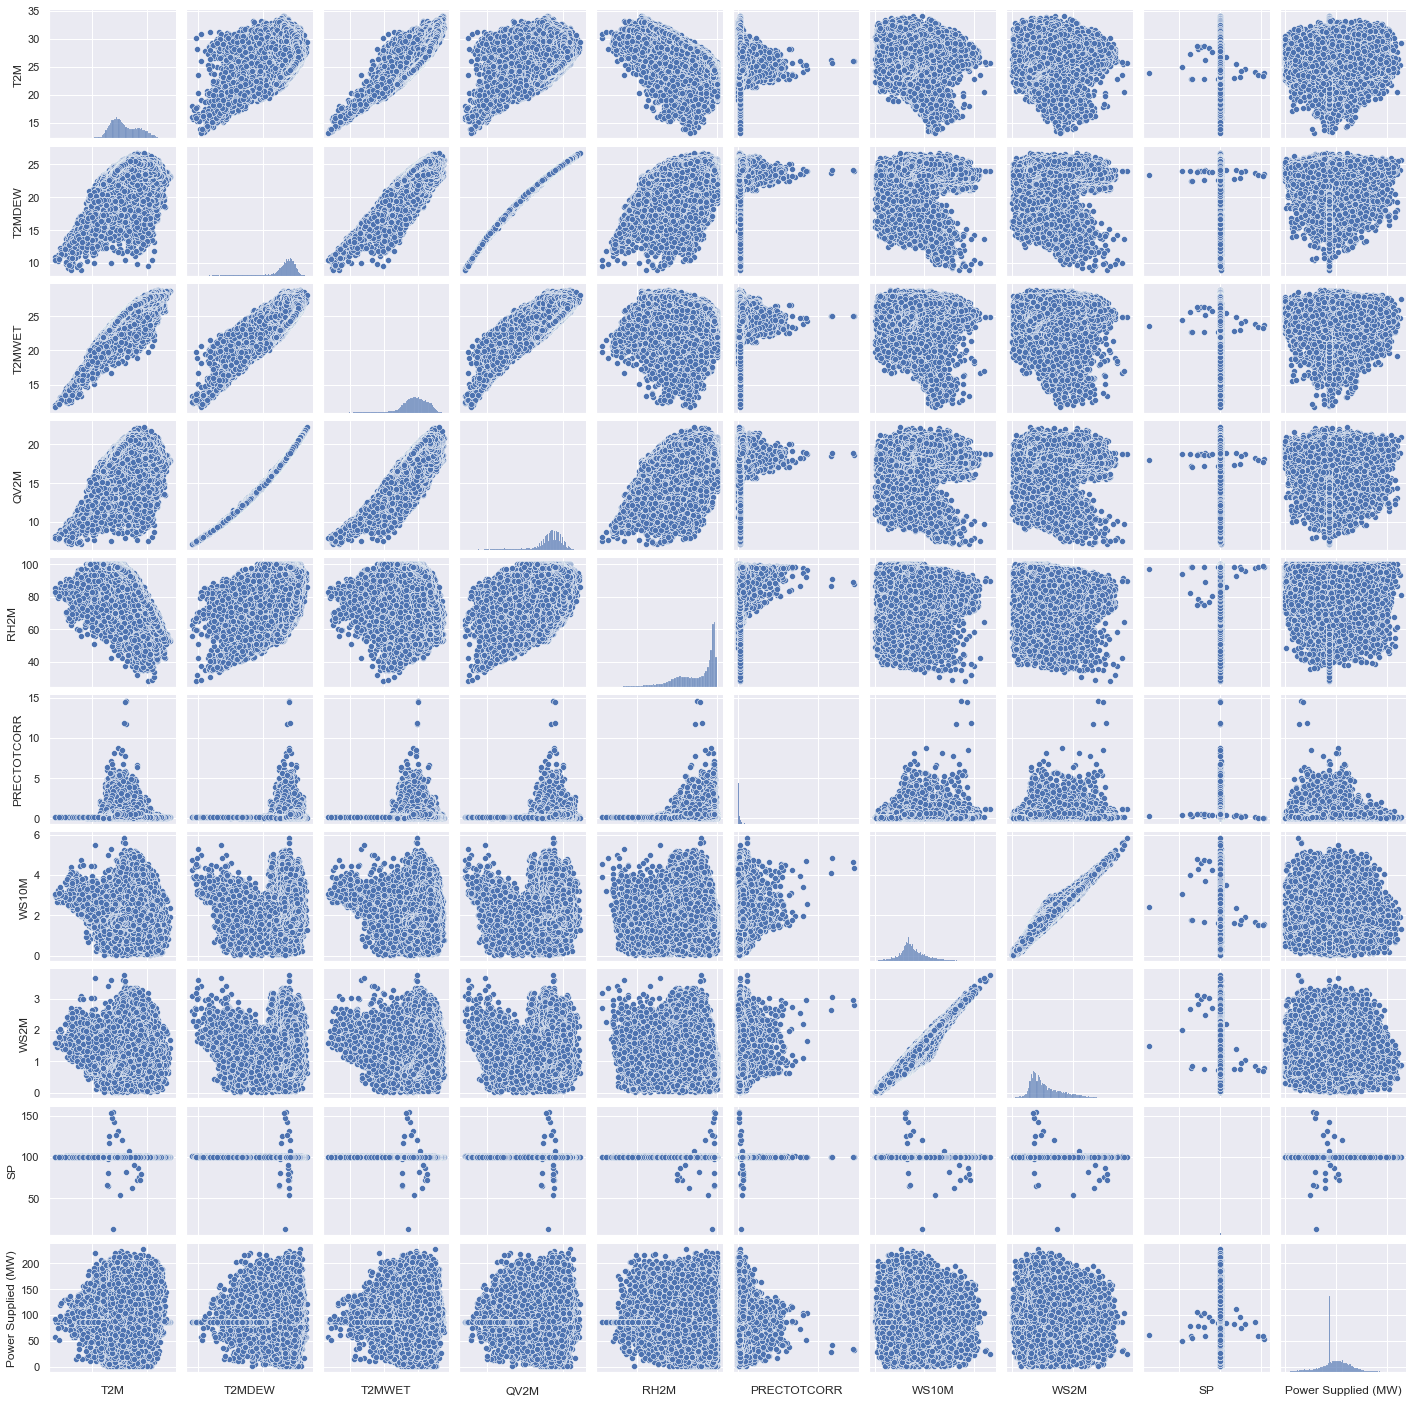

In [263]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g=sns.pairplot(datamean[['T2M','T2MDEW','T2MWET','QV2M','RH2M','PRECTOTCORR','WS10M','WS2M','SP','Power Supplied (MW)']],size=2)
g.set(xticklabels=[])

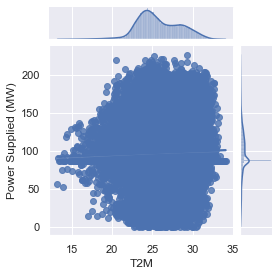

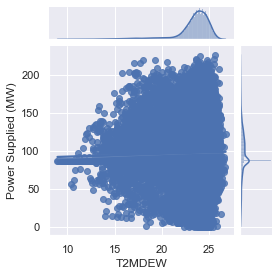

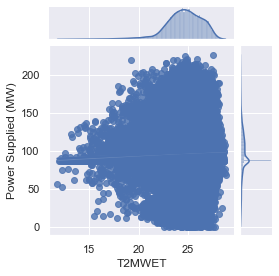

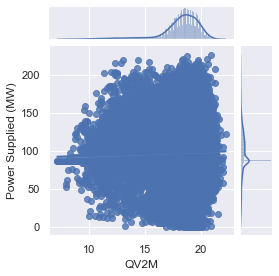

In [276]:
sns.jointplot(x='T2M',y='Power Supplied (MW)',data=datamean,kind='reg',size=4)
sns.jointplot(x='T2MDEW',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)
sns.jointplot(x='T2MWET',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)
sns.jointplot(x='QV2M',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)

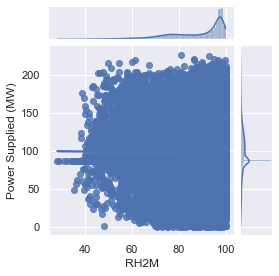

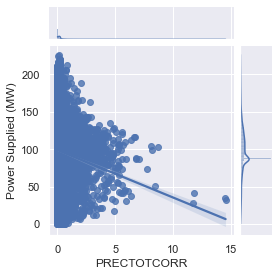

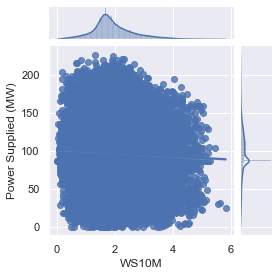

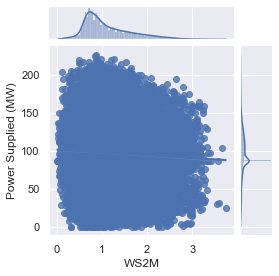

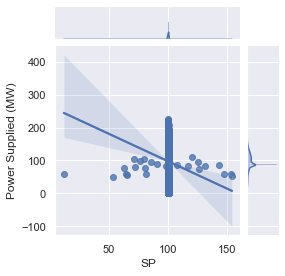

In [275]:
sns.jointplot(x='RH2M',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)
sns.jointplot(x='PRECTOTCORR',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)
sns.jointplot(x='WS10M',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)
sns.jointplot(x='WS2M',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)
sns.jointplot(x='SP',y='Power Supplied (MW)',data=datamedian,kind='reg',size=4)

In [266]:
# X(Independent variables) and y(target variables) 
X = datamean.iloc[:,0:8].values
y = datamean.iloc[:,9].values

In [267]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [268]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# example of power transform input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

In [269]:
from sklearn.preprocessing import StandardScaler
#scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [270]:
# prepare the model with input scaling
pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 24.897


# Multiple  Linear Regression

In [271]:
from sklearn.linear_model import LinearRegression

In [348]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [349]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [350]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [351]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]})
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  2.0
Decision tree  Regression Model Score is  -86.0
Random Forest Regression Model Score is  3.0


,Model,Score,Explained Variance Score
2,Random forest Regression,0.034028,-5.149023
0,Multiple Linear Regression,0.018179,-51.545168
1,Decision Tree,-0.864376,-0.764698


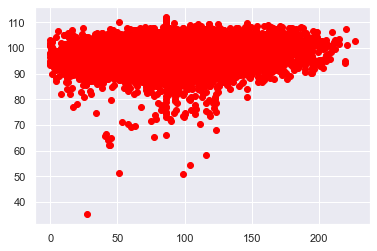

In [280]:
plt.plot(y_test,y_pred,  'o', color='red');

In [299]:
r2_score(y_test,y_pred)

0.018178659742117742

In [286]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [287]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 25.386755374134477
 RMSE: 1112.5420582152856


# Decsion Tree Regressor

In [343]:
tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [344]:
y_pred= tr_regressor.predict(X_test)
pd.DataFrame({'test':y_test,'pred':y_pred}).head()

ValueError: Data must be 1-dimensional

In [ ]:
y_pred

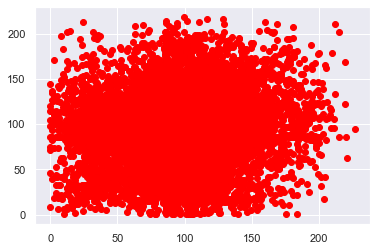

In [307]:
plt.plot(y_test,y_pred,  'o', color='red');

In [308]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 34.87993538318333
 RMSE: 2097.1962383553305


# Random Forest Regressor

In [315]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [317]:
y_pred= rf_regressor.predict(X_test)

In [318]:
pd.DataFrame({'test':y_test,'pred':y_pred}).head(5)

ValueError: Data must be 1-dimensional

In [311]:
 from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [312]:
mean_squared_score = mean_squared_error(rf_pred,y_test)

In [313]:
print("MEAN SQUARED SCORE", mean_squared_score)

MEAN SQUARED SCORE 1094.5826493795191


In [131]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  2.0
Decision tree  Regression Model Score is  -82.0
Random Forest Regression Model Score is  4.0


,Model,Score,Explained Variance Score
2,Random forest Regression,0.036565,-4.744587
0,Multiple Linear Regression,0.018172,-50.635501
1,Decision Tree,-0.824866,-0.720942


In [132]:
y_train

array([ 96.5       , 108.3       ,  90.1       , ..., 115.8       ,
        86.20920001, 104.4       ])

In [345]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'mean_squared_score'
#scoring = 'accuracy'

In [346]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))

In [347]:
# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ValueError: 'mean_squared_score' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [68]:
# Spot-Check Algorithms
models = []
models.append(('SVR', SVR()))

In [69]:

# evaluate each model in turn

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KeyboardInterrupt: 

In [112]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.mean_squared_error(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

AttributeError: 'LinearRegression' object has no attribute 'mean_squared_error'

In [155]:
# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

In [160]:
%%timeit
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 24.874
Mean MAE: 24.874
Mean MAE: 24.874
Mean MAE: 24.874
Mean MAE: 24.874
Mean MAE: 24.874
Mean MAE: 24.874
Mean MAE: 24.874
4.04 s ± 91.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [158]:

# example of power transform input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor


Mean MAE: 24.897


In [198]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

In [202]:
data.head()

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,Power Supplied (MW)
0,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
1,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
3,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
4,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [204]:
X

array([[0.51867816, 0.83445567, 0.71394938, ..., 0.01375516, 0.23793103,
        0.15549598],
       [0.51532567, 0.8305275 , 0.71041789, ..., 0.01444292, 0.23275862,
        0.15281501],
       [0.51149425, 0.82547699, 0.70453208, ..., 0.01444292, 0.23103448,
        0.15013405],
       ...,
       [0.55603448, 0.87317621, 0.75691583, ..., 0.04057772, 0.26896552,
        0.19571046],
       [0.5440613 , 0.86251403, 0.74396704, ..., 0.03713893, 0.25      ,
        0.16085791],
       [0.53735632, 0.85297419, 0.73513832, ..., 0.03301238, 0.25      ,
        0.15817694]])

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [201]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [205]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['T2M', 'T2MDEW', 'T2MWET', 'QV2M', 'RH2M','PRECTOTCORR','WS10M','WS2M','SP','Power Supplied (MW)']
datamean[num_vars] = scaler.fit_transform(datamean[num_vars])

In [228]:
datamean.head()

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,Power Supplied (MW)
0,0.518678,0.834456,0.713949,0.752653,0.977422,0.013755,0.237931,0.155496,0.621171,0.300353
1,0.515326,0.830527,0.710418,0.748674,0.977422,0.014443,0.232759,0.152815,0.620748,0.287544
2,0.511494,0.825477,0.704532,0.744695,0.975610,0.014443,0.231034,0.150134,0.620466,0.265018
3,0.504789,0.818182,0.696881,0.732759,0.977422,0.013755,0.234483,0.152815,0.620325,0.256625
4,0.499521,0.812009,0.690406,0.728780,0.979094,0.013067,0.239655,0.160858,0.620466,0.250000


In [229]:
datamean.describe()

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,Power Supplied (MW)
count,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000
mean,0.600584,0.803980,0.748298,0.724264,0.821020,0.016044,0.331002,0.298865,0.620838,0.429262
std,0.128705,0.119595,0.117356,0.135684,0.175715,0.029322,0.127044,0.145294,0.005689,0.146933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.511015,0.783389,0.689229,0.688329,0.702997,0.003439,0.258621,0.193029,0.619901,0.365724
50%,0.579981,0.832772,0.758093,0.752653,0.894634,0.012862,0.308621,0.254692,0.620819,0.420053
75%,0.698276,0.873176,0.829311,0.809682,0.964321,0.013755,0.391379,0.378016,0.621807,0.517226
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [231]:
X_train

array([[0.46791188, 0.76318743, 0.64508534, ..., 0.00550206, 0.21724138,
        0.17158177],
       [0.75862069, 0.92424242, 0.90818128, ..., 0.02544704, 0.32586207,
        0.3538874 ],
       [0.71216475, 0.82659933, 0.82872278, ..., 0.04607978, 0.32758621,
        0.34316354],
       ...,
       [0.59291188, 0.88664422, 0.78693349, ..., 0.00687758, 0.4137931 ,
        0.35656836],
       [0.56178161, 0.48484848, 0.55679812, ..., 0.01286172, 0.09310345,
        0.09919571],
       [0.38649425, 0.67340067, 0.54855798, ..., 0.        , 0.3       ,
        0.230563  ]])

In [232]:
y_train

array([ 96.5       , 108.3       ,  90.1       , ..., 115.8       ,
        86.20920001, 104.4       ])

In [233]:
X_test

array([[0.62787356, 0.76767677, 0.74632137, ..., 0.01286172, 0.28103448,
        0.19571046],
       [0.51676245, 0.84960718, 0.72101236, ..., 0.00137552, 0.31724138,
        0.23592493],
       [0.45498084, 0.75645342, 0.6339023 , ..., 0.00206327, 0.27586207,
        0.19302949],
       ...,
       [0.59099617, 0.84567901, 0.76456739, ..., 0.05708391, 0.45689655,
        0.44504021],
       [0.38745211, 0.67564534, 0.55032372, ..., 0.01286172, 0.27586207,
        0.21179625],
       [0.63409962, 0.89786756, 0.81753973, ..., 0.01286172, 0.34655172,
        0.31099196]])

In [234]:
y_test

array([111.        ,  86.20920001, 119.2       , ..., 113.2       ,
       148.4       ,  86.20920001])

In [235]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [236]:
y_pred= mlr.predict(X_test)
pd.DataFrame({'test':y_test,'pred':y_pred}).head()

,test,pred
0,111.0000,104.563324
1,86.2092,99.846368
2,119.2000,96.953950
3,88.5000,88.065706
4,195.4000,106.123460


In [220]:
mlr.score(X_test,y_test)

0.018171832968347346

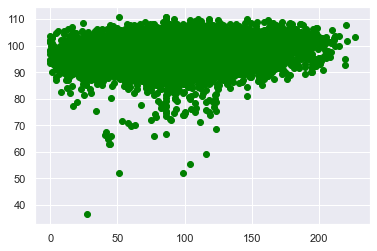

In [219]:
plt.plot(y_test,y_pred,  'o', color='green');

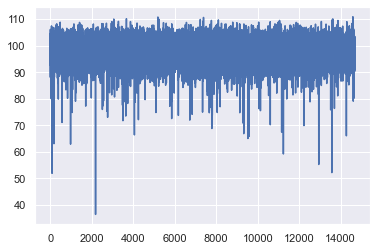

In [227]:
plt.plot(y_pred)
#plt.plot(y_test)
plt.show()

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load


#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[8]
output_dim = y_train.shape[1]

def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

IndexError: tuple index out of range

In [243]:
## for Deep-learing:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Activation
#from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D,Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


# Model architecture
1) LSTM with 100 neurons in the first visible layer 3) dropout 20% 4) 1 neuron in the output layer for predicting Global_active_power. 5) The input shape will be 1 time step with 7 features. 6) I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent. 7) The model will be fit for 20 training epochs with a batch size of 70.

In [247]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Dense(1))
#model.add(keras.layers.Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')#(0.001))

IndexError: tuple index out of range

In [248]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [250]:
model = Sequential()
model.add(LSTM(units=5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

IndexError: tuple index out of range

In [251]:

# define model
model = Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(7, 8)))
model.add(RepeatVector(4))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

NameError: name 'RepeatVector' is not defined